### 복습

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [9]:
wine_df = pd.read_csv('./data/wine.csv', header=None)
wine_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [10]:
X = wine_df.iloc[:, :-1]
y = wine_df.iloc[:, -1]
print(X.shape, y.shape)

(6497, 12) (6497,)


In [11]:
model = keras.Sequential(name='wine')
model.add(keras.layers.Dense(30, input_shape=(12, ), activation = 'relu', name='hidden1'))
model.add(keras.layers.Dense(12, activation = 'relu', name='hidden2'))
model.add(keras.layers.Dense(8, activation = 'relu', name='hidden3'))
model.add(keras.layers.Dense(1, activation = 'sigmoid', name='output'))
model.summary()

Model: "wine"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden1 (Dense)             (None, 30)                390       
                                                                 
 hidden2 (Dense)             (None, 12)                372       
                                                                 
 hidden3 (Dense)             (None, 8)                 104       
                                                                 
 output (Dense)              (None, 1)                 9         
                                                                 
Total params: 875
Trainable params: 875
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics='acc')

In [17]:
import os
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(4547, 12) (4547,)
(1950, 12) (1950,)


In [19]:
model_path = './model/{epoch:2d}-{val_loss:.4f}.hdf5'
checkpoint = keras.callbacks.ModelCheckpoint(filepath=model_path, verbose=1, save_best_only=True)
earlystop = keras.callbacks.EarlyStopping(patience=10)
history = model.fit(X_train, y_train, epochs=200, batch_size=400, validation_split=0.2, verbose=1, callbacks=[checkpoint, earlystop])

Epoch 1/200
 1/10 [==>...........................] - ETA: 0s - loss: 0.1337 - acc: 0.9625

c:\Users\Jasper\anaconda3\envs\deeplearning\lib\site-packages\keras\engine\data_adapter.py:1699: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]



Epoch 1: val_loss improved from inf to 0.13228, saving model to ./model\ 1-0.1323.hdf5
10/10 [==============================] - 0s 37ms/step - loss: 0.1491 - acc: 0.9516 - val_loss: 0.1323 - val_acc: 0.9516
Epoch 2/200
 1/10 [==>...........................] - ETA: 0s - loss: 0.1322 - acc: 0.9550
Epoch 2: val_loss improved from 0.13228 to 0.13220, saving model to ./model\ 2-0.1322.hdf5
10/10 [==============================] - 0s 8ms/step - loss: 0.1355 - acc: 0.9541 - val_loss: 0.1322 - val_acc: 0.9527
Epoch 3/200
 1/10 [==>...........................] - ETA: 0s - loss: 0.1434 - acc: 0.9425
Epoch 3: val_loss improved from 0.13220 to 0.13011, saving model to ./model\ 3-0.1301.hdf5
10/10 [==============================] - 0s 8ms/step - loss: 0.1356 - acc: 0.9544 - val_loss: 0.1301 - val_acc: 0.9516
Epoch 4/200
 1/10 [==>...........................] - ETA: 0s - loss: 0.1597 - acc: 0.9375
Epoch 4: val_loss did not improve from 0.13011
10/10 [==============================] - 0s 5ms/step - 

In [20]:
model.evaluate(X_test, y_test)

61/61 [==============================] - 0s 1ms/step - loss: 0.0678 - acc: 0.9810


[0.0677850991487503, 0.9810256361961365]

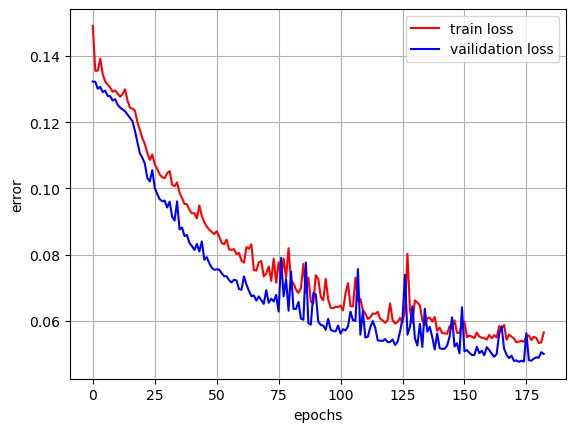

In [23]:
fig, ax = plt.subplots()
ax.plot(history.history['loss'], c='red', label='train loss')
ax.plot(history.history['val_loss'], c='blue', label='vailidation loss')
ax.set_xlabel('epochs')
ax.set_ylabel('error')
ax.legend()
ax.grid()
plt.show()

In [24]:
model.save('best_wine_model_0203.hdf5')

In [25]:
model_imported = keras.models.load_model('best_wine_model_0203.hdf5')

In [26]:
model_imported.evaluate(X_test, y_test)

61/61 [==============================] - 0s 1ms/step - loss: 0.0678 - acc: 0.9810


[0.0677850991487503, 0.9810256361961365]

### 이미지 인식

In [74]:
# mnist dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [44]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [45]:
np.unique(y_train, return_counts=True) # uint8은 부호없는 정수이기 때문에 float로 변경 작업 필요

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949],
       dtype=int64))

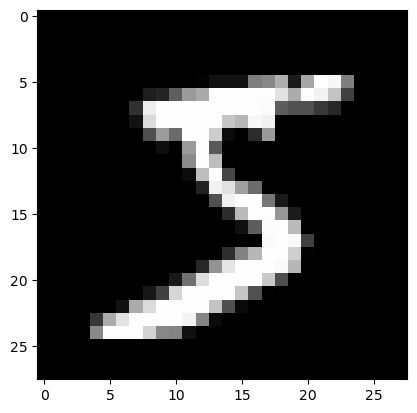

In [46]:
plt.imshow(X_train[0], cmap='gray')
plt.show()

In [63]:
## dimension (3차원을 2차원으로 바꿀 필요가 있음)

X_train_784 = (X_train/255.).reshape(-1, 28 * 28) # divide 할 때 . 써주면 float 타입으로 자동 적용
X_test_784 = (X_test/255.).reshape(-1, 28 * 28) # divide 할 때 . 써주면 float 타입으로 자동 적용
print(X_train_784.shape, X_train_784.dtype)
print(X_test_784.shape, X_test_784.dtype)

## y-onehot 인코딩
y_train_hot = keras.utils.to_categorical(y_train)
y_test_hot = keras.utils.to_categorical(y_test)
print(y_train_hot.shape)
print(y_train_hot[0])

(60000, 784) float64
(10000, 784) float64
(60000, 10)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


### 모델 생성 (DNN, Dense Neural  Network)
[DNN이란](http://www.tcpschool.com/deeplearning/deep_algorithm1)

In [60]:
model = keras.Sequential(name='mnist_784')
model.add(keras.layers.Dense(512, input_shape=(784, ), activation='relu', name='hidden'))
model.add(keras.layers.Dense(10, activation='softmax', name='output')) # 카테고리가 10개니까 노드 10개(0~9 확인)
model.summary()

Model: "mnist_784"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden (Dense)              (None, 512)               401920    
                                                                 
 output (Dense)              (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [62]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics='acc')

model_path = './model/mnist_784.hdf5'
checkpoint = keras.callbacks.ModelCheckpoint(filepath=model_path, verbose=1, save_best_only=True)
earlystop = keras.callbacks.EarlyStopping(patience=10)
history = model.fit(X_train_784, y_train_hot, epochs=1000, batch_size=200, validation_split=0.3, callbacks=[checkpoint, earlystop])

Epoch 1/1000
204/210 [============================>.] - ETA: 0s - loss: 0.3497 - acc: 0.9040
Epoch 1: val_loss improved from inf to 0.19476, saving model to ./model\mnist_784.hdf5
210/210 [==============================] - 2s 5ms/step - loss: 0.3451 - acc: 0.9052 - val_loss: 0.1948 - val_acc: 0.9441
Epoch 2/1000
207/210 [============================>.] - ETA: 0s - loss: 0.1468 - acc: 0.9578
Epoch 2: val_loss improved from 0.19476 to 0.14039, saving model to ./model\mnist_784.hdf5
210/210 [==============================] - 1s 4ms/step - loss: 0.1470 - acc: 0.9577 - val_loss: 0.1404 - val_acc: 0.9583
Epoch 3/1000
210/210 [==============================] - ETA: 0s - loss: 0.0994 - acc: 0.9715
Epoch 3: val_loss improved from 0.14039 to 0.11890, saving model to ./model\mnist_784.hdf5
210/210 [==============================] - 1s 4ms/step - loss: 0.0994 - acc: 0.9715 - val_loss: 0.1189 - val_acc: 0.9646
Epoch 4/1000
204/210 [============================>.] - ETA: 0s - loss: 0.0718 - acc: 0.9

In [64]:
model.evaluate(X_test_784, y_test_hot)

313/313 [==============================] - 1s 1ms/step - loss: 0.0727 - acc: 0.9811


[0.07269196212291718, 0.9811000227928162]

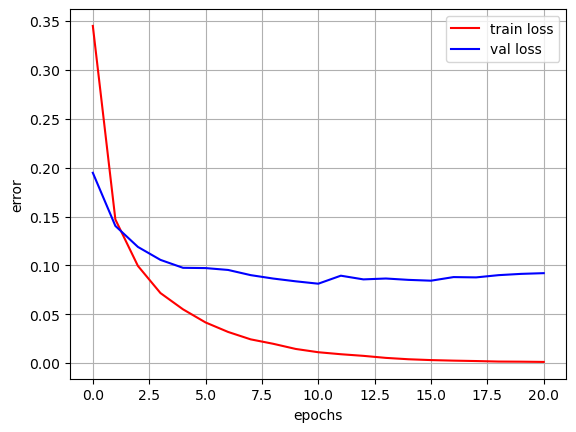

In [65]:
fig, ax = plt.subplots()
ax.plot(history.history['loss'], c='red', label='train loss')
ax.plot(history.history['val_loss'], c='blue', label='val loss')
ax.set_xlabel('epochs')
ax.set_ylabel('error')
ax.legend()
ax.grid()
plt.show()

### CNN 모델 실습

In [71]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 28, 28, 1) (60000,)
(10000, 28, 28, 1) (10000,)


In [75]:
X_train = (X_train/255.).reshape(-1, 28, 28, 1) # 마지막이 1인 이유? 흑백이라서..
X_test = (X_test/255.).reshape(-1, 28, 28, 1)
# y_train_hot
# y_test_hot

In [76]:
model = keras.Sequential(name='mnist_cnn')
model.add(keras.layers.Conv2D(32, input_shape = (28, 28, 1), kernel_size = (3,3), activation='relu'))
model.add(keras.layers.Conv2D(64, kernel_size = (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(10, activation='softmax'))
model.summary()

Model: "mnist_cnn"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                         

In [78]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics='acc')
model_path='./model/mnist_best_cnn.hdf5'
checkpoint = keras.callbacks.ModelCheckpoint(filepath=model_path, verbose=1, save_best_only=True)
earlystop = keras.callbacks.EarlyStopping(patience=10)
history = model.fit(X_train, y_train_hot, validation_split=0.3, epochs=100, batch_size=200, callbacks=[checkpoint,earlystop])

model.evaluate(X_test, y_test_hot)

Epoch 1/100
210/210 [==============================] - ETA: 0s - loss: 0.2905 - acc: 0.9096
Epoch 1: val_loss improved from inf to 0.07394, saving model to ./model\mnist_best_cnn.hdf5
210/210 [==============================] - 19s 87ms/step - loss: 0.2905 - acc: 0.9096 - val_loss: 0.0739 - val_acc: 0.9790
Epoch 2/100
210/210 [==============================] - ETA: 0s - loss: 0.0758 - acc: 0.9765
Epoch 2: val_loss improved from 0.07394 to 0.05512, saving model to ./model\mnist_best_cnn.hdf5
210/210 [==============================] - 18s 88ms/step - loss: 0.0758 - acc: 0.9765 - val_loss: 0.0551 - val_acc: 0.9840
Epoch 3/100
210/210 [==============================] - ETA: 0s - loss: 0.0504 - acc: 0.9844
Epoch 3: val_loss improved from 0.05512 to 0.04886, saving model to ./model\mnist_best_cnn.hdf5
210/210 [==============================] - 18s 83ms/step - loss: 0.0504 - acc: 0.9844 - val_loss: 0.0489 - val_acc: 0.9858
Epoch 4/100
210/210 [==============================] - ETA: 0s - loss: 

[0.04000396281480789, 0.9891999959945679]

### GAN 오토인코더

In [22]:
del generator

In [24]:
## 생성자 모델
generator = keras.Sequential()
generator.add(keras.layers.Dense(128*7*7, input_shape=(100, ), activation='linear'))
generator.add(keras.layers.BatchNormalization())
generator.add(keras.layers.LeakyReLU(0.2))
generator.add(keras.layers.Reshape((7,7,128)))
generator.add(keras.layers.UpSampling2D())
generator.add(keras.layers.Conv2D(64, kernel_size=5, padding='same'))
generator.add(keras.layers.BatchNormalization())
generator.add(keras.layers.LeakyReLU(0.2))
generator.add(keras.layers.UpSampling2D())
generator.add(keras.layers.Conv2D(1, kernel_size=5, padding='same', activation='tanh'))
generator.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 6272)              633472    
                                                                 
 batch_normalization_10 (Bat  (None, 6272)             25088     
 chNormalization)                                                
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 6272)              0         
                                                                 
 reshape_3 (Reshape)         (None, 7, 7, 128)         0         
                                                                 
 up_sampling2d_5 (UpSampling  (None, 14, 14, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)      

In [26]:
## 판별자 생성
discriminator = keras.Sequential()
discriminator.add(keras.layers.Conv2D(64, kernel_size=5, strides=2, input_shape=(28,28,1), padding='same', activation='relu'))
discriminator.add(keras.layers.Activation(keras.layers.LeakyReLU(0.2)))
discriminator.add(keras.layers.Dropout(0.3))
discriminator.add(keras.layers.Conv2D(128, kernel_size=5, strides=2, padding='same', activation='relu'))
discriminator.add(keras.layers.Flatten())
discriminator.add(keras.layers.Dense(1, activation='sigmoid'))
discriminator.compile(loss='binary_crossentropy', optimizer='adam')
discriminator.trainable = False
discriminator.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 14, 14, 64)        1664      
                                                                 
 activation (Activation)     (None, 14, 14, 64)        0         
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 7, 7, 128)         204928    
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense_9 (Dense)             (None, 1)                 6273      
                                                                 
Total params: 212,865
Trainable params: 0
Non-trainab

In [27]:
## 생성자와 판별자를 연결
ginput = keras.layers.Input(shape=(100,))
dis_output = discriminator(generator(ginput))
gan = keras.models.Model(ginput, dis_output)

gan.compile(loss='binary_crossentropy', optimizer='adam')
gan.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100)]             0         
                                                                 
 sequential_10 (Sequential)  (None, 28, 28, 1)         865281    
                                                                 
 sequential_12 (Sequential)  (None, 1)                 212865    
                                                                 
Total params: 1,078,146
Trainable params: 852,609
Non-trainable params: 225,537
_________________________________________________________________


In [ ]:
def gan_train(epoch, batch_size, saving_interval):
    (X_train, _), (_, _) = keras.datasets.mnist.load_data()
    X_train = X_train.reshape(-1,28,28,1)
    X_train = (X_train - 127.5) / 127.5

    true = np.ones((batch_size, 1))
    fake = np.zeros((batch_size, 1))

    for i in range(epoch):
        idx = np.random.randint(0, X_train.shape[0], batch_size)
        imgs = X_train[idx]

        d_loss_real = discriminator.train_on_batch(imgs, true)

        noise = np.random.normal()
        gen_images = generator.predict(noise)
        d_loss_fake = discriminator.train_on_batch(gen_images, fake)

        d_loss = 0.5 * (d_loss_fake + d_loss_real)
        g_loss = gan.train_on_batch(noise, true)

        if i % saving_interval == 0:
            noise = np.random.normal(0,1,(25,100))
            gen_images = generator.predict(noise)

            gen_images = 0.5 * gen_images + 0.5

            fig, ax = plt.subplots(5,5)
            count = 0
            for j in range(5):
                for k in range(5):
                    ax[j, k].imshow(gen_images[count, :,:,0], cmap='gray')
                    ax[j, k].axis('off')
                    count += 1
            fig.savefig('./gan_image_{}'.format(i))
